# Preprocessing

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
from IPython.display import display
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.vfm.utils.descriptive_utils import *
from src.vfm.model.hybrid.physics_informed import PhysicsInformedHybridModel
from src.vfm.model.hybrid.latent_physics_informed import LatentPhysicsInformedHybridModel
from src.vfm.model.physics.gas_well_physics import GasDominatedMultiphaseWellPhysicsModel
import json


In [5]:
connection = Connection()
# Get client
client = connection.get_client()

In [6]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'gl_mass_rate',
       'gl_open_ratio', 'qo_well_test', 'qg_well_test', 'qw_well_test',
       'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id'],
      dtype='object')

In [7]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [8]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Total original record count 834
W06 original record count: 137
W06 Record count before target preprocessing: 100
W06 Record count after target preprocessing: 100
W06 Record count after preprocessing: 100
W08 original record count: 69
W08 Record count before target preprocessing: 66
W08 Record count after target preprocessing: 66
W08 Record count after preprocessing: 66
W10 original record count: 222
W10 Record count before target preprocessing: 221
W10 Record count after target preprocessing: 221
W10 Record count after preprocessing: 221
W11 original record count: 154
W11 Record count before target preprocessing: 119
W11 Record count after target preprocessing: 119
W11 Record count after preprocessing: 119
W15 original record count: 86
W15 Record count before target preprocessing: 86
W15 Record count after target preprocessing: 86
W15 Record count after preprocessing: 86
W18 original record count: 89
W18 Record count before target preprocessing: 86
W18 Record count after target preproc

755

In [9]:
summarize_null(df_all_wells_preprocessed)

qo_well_test      0
qg_well_test      0
qw_well_test      0
well_code         0
dhp               0
dht               0
whp               0
wht               0
choke             0
dcp               0
gl_mass_rate      0
gl_open_ratio     0
qo_mpfm          30
qg_mpfm          30
qw_mpfm          30
wc_mpfm           0
gor_mpfm         35
wgr_mpfm         36
gor_well_test     0
wgr_well_test     0
well_id           0
time_idx          0
dtype: int64

In [10]:
df_train, df_val, df_test = get_random_train_val_test_split_per_well_temporal_order(df=df_all_wells_preprocessed)
print(f"Train={len(df_train)}, Validation={len(df_val)}, Test={len(df_test)}")

Train=543, Validation=78, Test=134


In [11]:
well_geometry: dict = None

with open(r"data\well_geometry.json", "r") as f:
    well_geometry = json.load(f)

In [14]:
model = LatentPhysicsInformedHybridModel(
    physics_model_cls=GasDominatedMultiphaseWellPhysicsModel,
    lags=2,
)

model.fit(df_train)


dp min: 66.96096642700857
dp median: 103.94296745243076
dp <= 0 count: 0


[autoreload of src.vfm.model.physics.gas_well_physics failed: Traceback (most recent call last):
  File "c:\Users\perer\Documents\Code\pcperera\vfm\.venv\Lib\site-packages\IPython\extensions\autoreload.py", line 322, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\perer\Documents\Code\pcperera\vfm\.venv\Lib\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 545, in maybe_reload_module
    new_source_code = f.read()
                      ^^^^^^^^
  File "C:\Users\perer\.pyenv\pyenv-win\versions\3.11.9\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 4644: character maps to <undefined>
]


ValueError: Missing required columns: {'qg'}

In [ ]:
physics_scores = model.score_physics(df_test)
physics_scores

{'W06': {'qo': {'r2': -65502.3327413929,
   'mae': 6508.256177900736,
   'rmse': 6529.70074576175,
   'mape (%)': 4897.451121835934,
   'mpe (%)': 4897.451121835934},
  'qw': {'r2': -4.588880645354837,
   'mae': 2.743904055413142,
   'rmse': 3.0656181183710656,
   'mape (%)': 33065.0081505006,
   'mpe (%)': 33063.986232173855},
  'qg': {'r2': -54772.61039999756,
   'mae': 801730.1918467167,
   'rmse': 804345.8421033499,
   'mape (%)': 4875.017532996261,
   'mpe (%)': 4875.017532996261}},
 'W08': {'qo': {'r2': -254316.29277720037,
   'mae': 3873.20537953356,
   'rmse': 3945.3020704456026,
   'mape (%)': 15417.778843392298,
   'mpe (%)': 15417.778843392298},
  'qw': {'r2': -0.32068814512414634,
   'mae': 23.846023333630175,
   'rmse': 40.879746067652825,
   'mape (%)': 9435.935987177503,
   'mpe (%)': 9418.043314407383},
  'qg': {'r2': -85149.4285518576,
   'mae': 481254.43401759677,
   'rmse': 490199.46102739894,
   'mape (%)': 51518.17959201166,
   'mpe (%)': 51518.17959201166}},
 'W10

In [ ]:
hybrid_scores = model.score_hybrid(df_test)
hybrid_scores

{'W06': {'qo': {'r2': 0.14604322348017684,
   'mae': 14.159802891715325,
   'rmse': 23.576510367467343,
   'mape (%)': 10.14385990559906,
   'mpe (%)': 1.7693422040202915},
  'qw': {'r2': 0.7273722613328276,
   'mae': 0.40885154803114443,
   'rmse': 0.6770810472981705,
   'mape (%)': 27.634097549808672,
   'mpe (%)': 1.8801257821347437},
  'qg': {'r2': 0.3827633003757559,
   'mae': 1711.1428369937926,
   'rmse': 2700.1196361574107,
   'mape (%)': 9.895250321801695,
   'mpe (%)': 1.1166063908848702}},
 'W08': {'qo': {'r2': -322.3871656786622,
   'mae': 39.37182588151987,
   'rmse': 140.68691435101528,
   'mape (%)': 105.75450334841226,
   'mpe (%)': 81.65235768987182},
  'qw': {'r2': -2016.1291318541512,
   'mae': 428.5450591167134,
   'rmse': 1597.625193608345,
   'mape (%)': 6283.603850967557,
   'mpe (%)': 6250.220353753937},
  'qg': {'r2': 0.6937299839730291,
   'mae': 716.675077116605,
   'rmse': 929.6760672502041,
   'mape (%)': 30.332420740833548,
   'mpe (%)': -9.534610224136545

In [ ]:
mpfm_scores = model.score_mpfm(df=df_test)
mpfm_scores

AttributeError: 'LatentPhysicsInformedHybridModel' object has no attribute 'score_mpfm'

In [ ]:
# df_physics = scores_to_df(physics_scores, "Physics")
# df_hybrid  = scores_to_df(hybrid_scores,  "Hybrid")
# df_mpfm    = scores_to_df(mpfm_scores,    "MPFM")

# df_all = pd.concat([df_physics, df_hybrid, df_mpfm], ignore_index=False)

# for well in get_all_wells():
#     df_display = df_all[(df_all["well_id"] == well) & (df_all["metric"] == "r2") & (df_all["variable"].isin(["qg", "qo", "qw"]))]
#     print(df_display[["well_id", "variable", "model", "metric", "value"]].reset_index(drop=True))
    # display(
    # df_display
    # .sort_values(["well_id", "variable"])
    # )

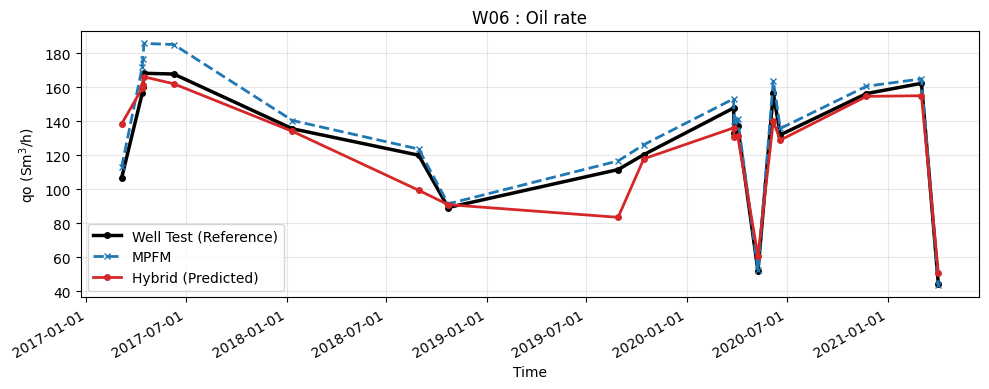

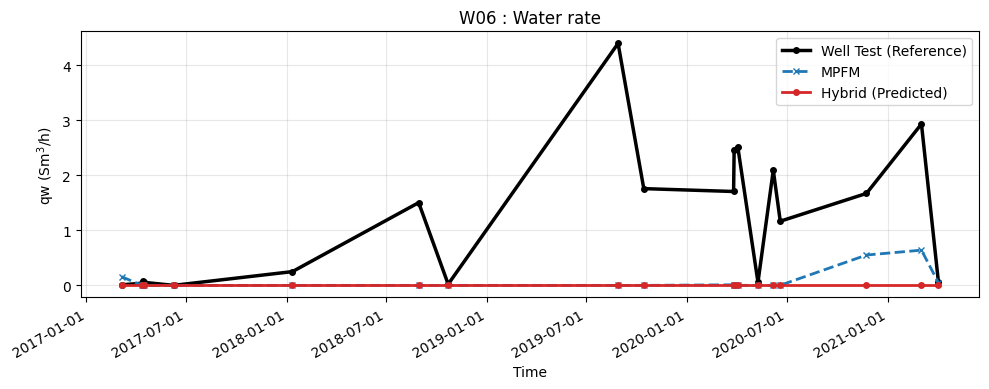

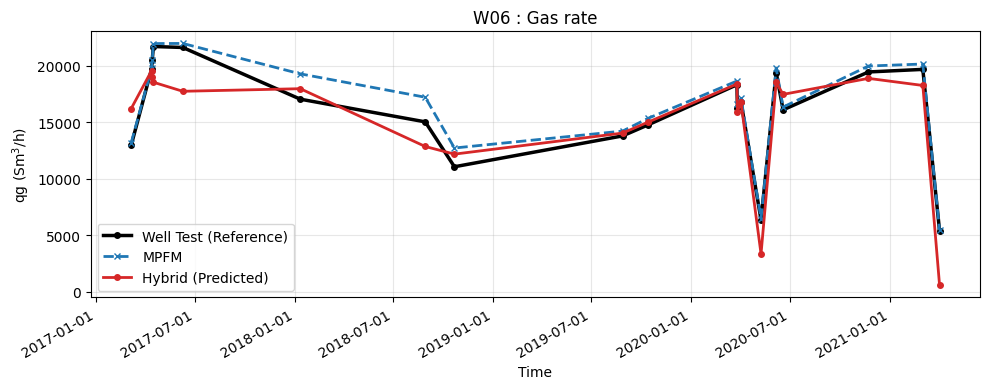

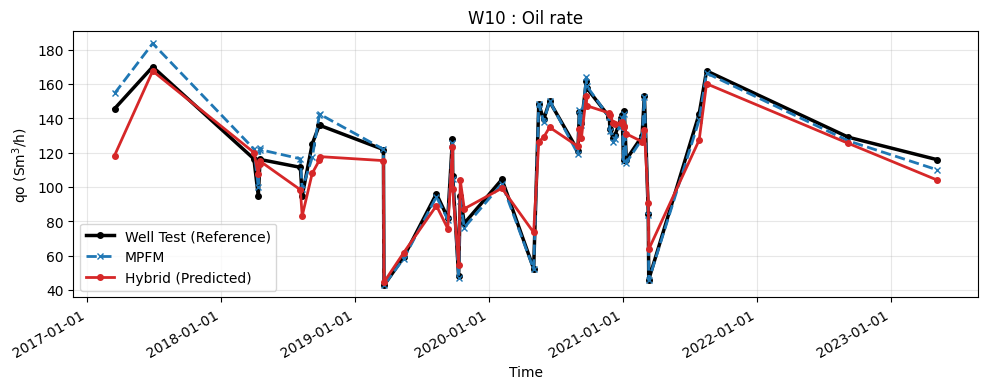

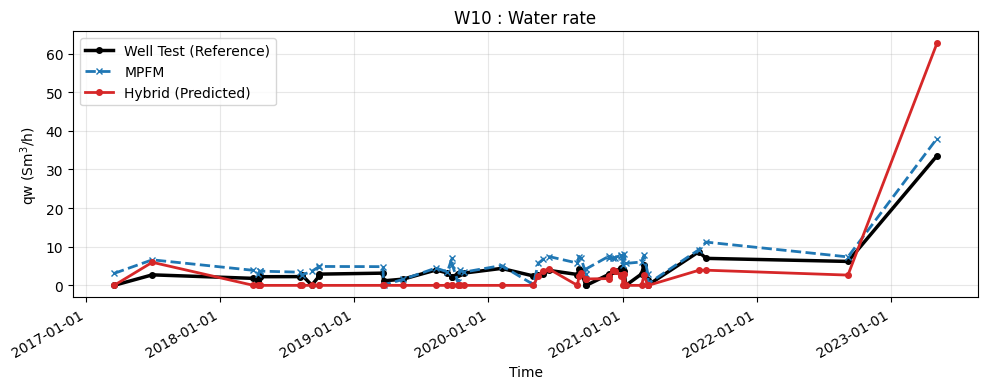

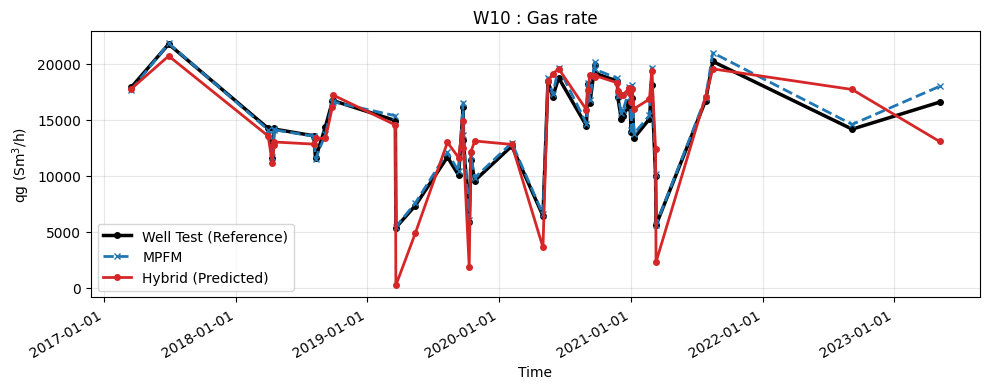

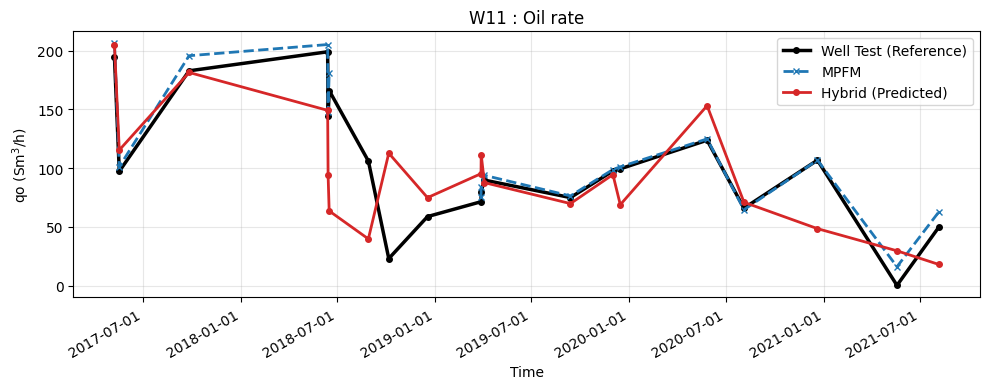

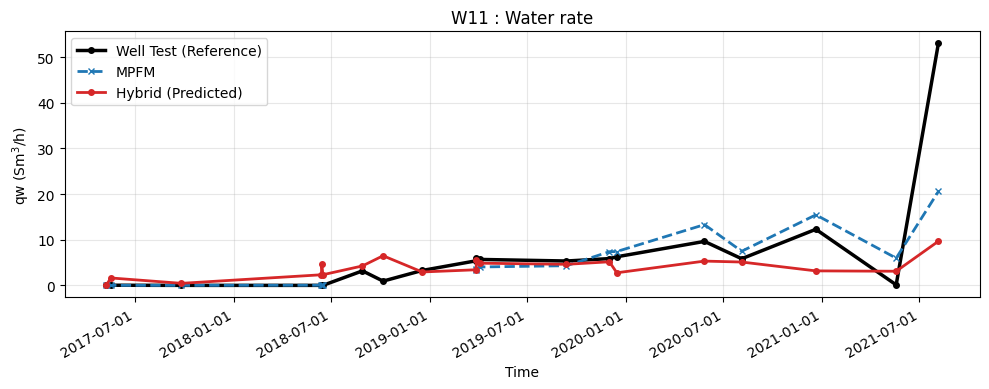

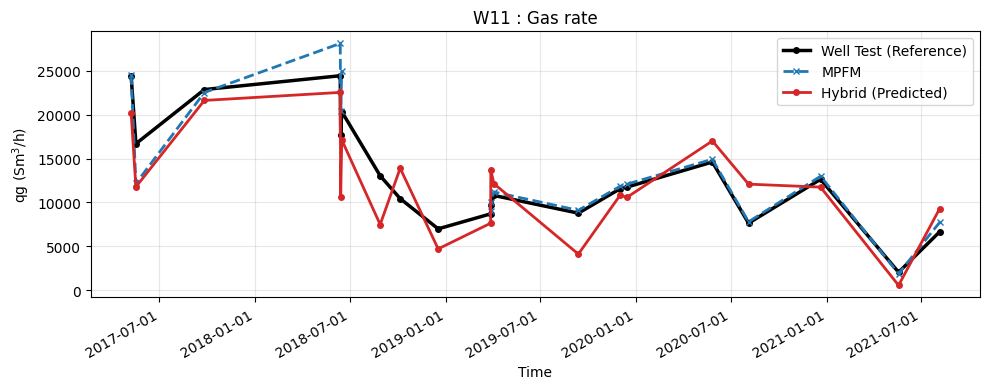

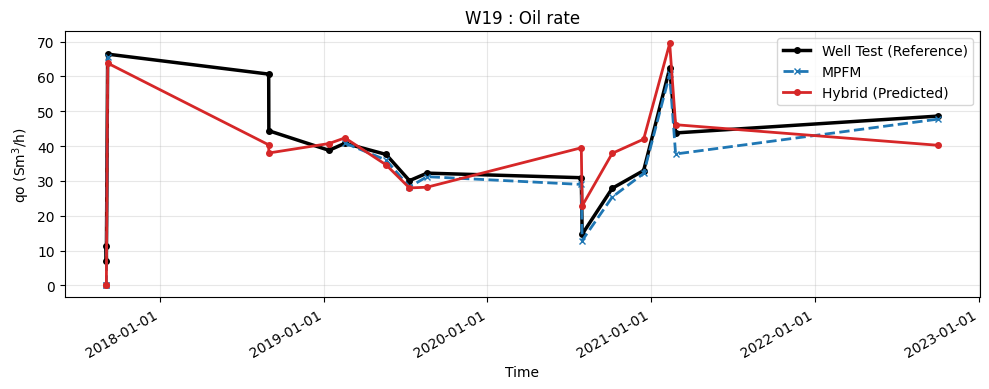

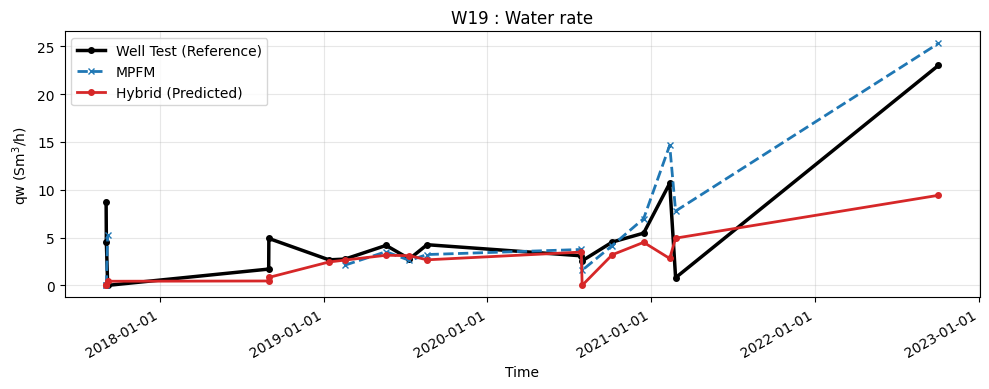

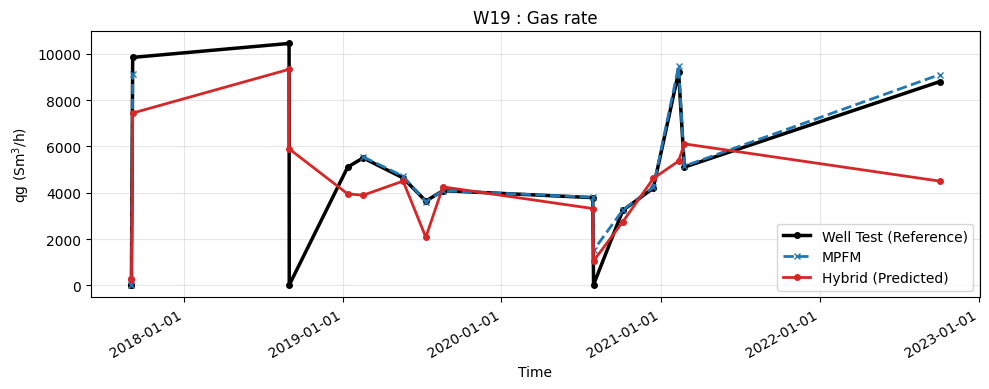

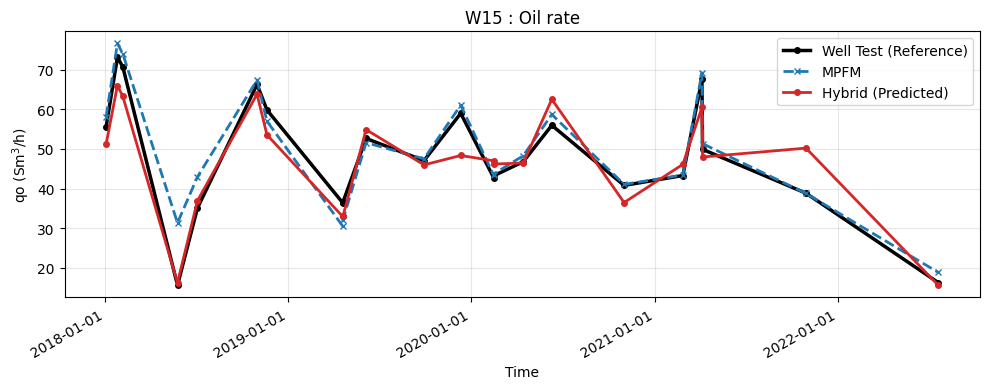

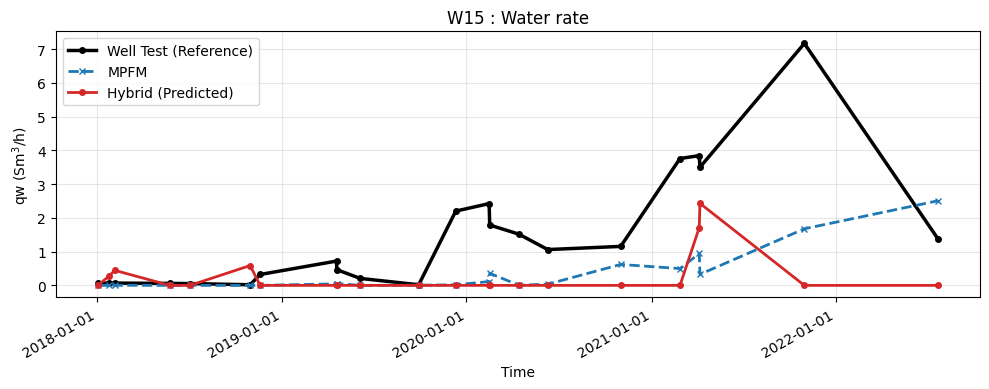

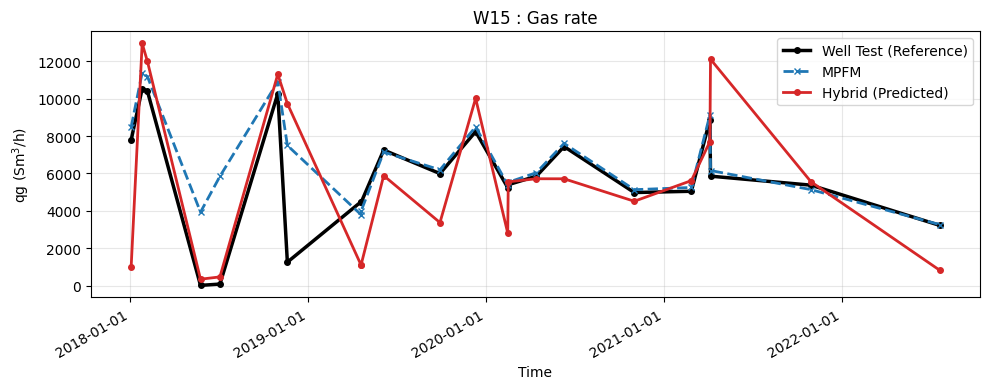

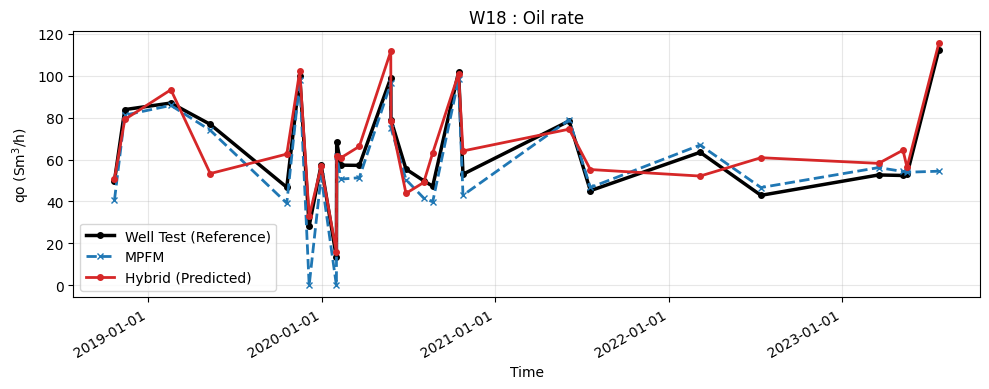

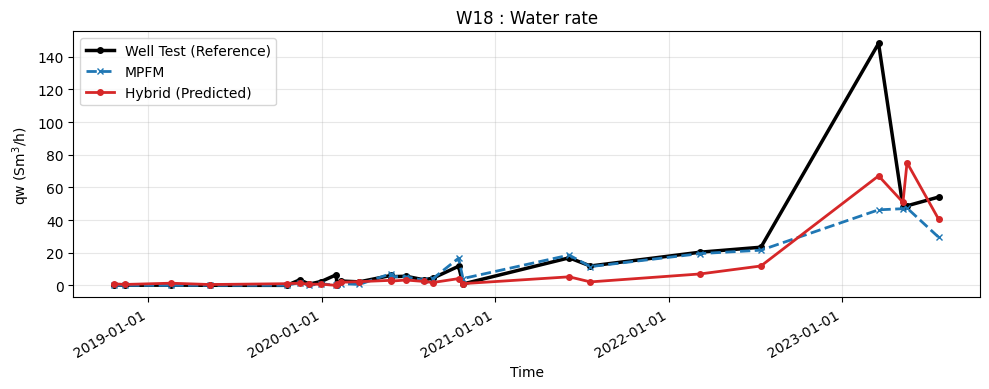

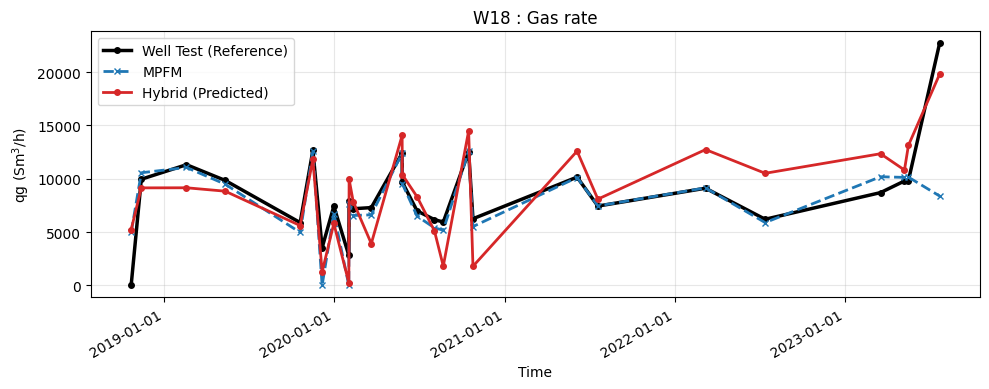

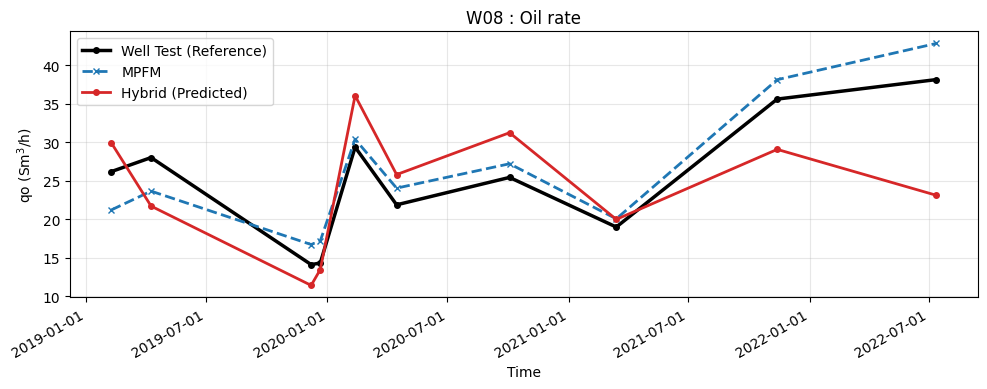

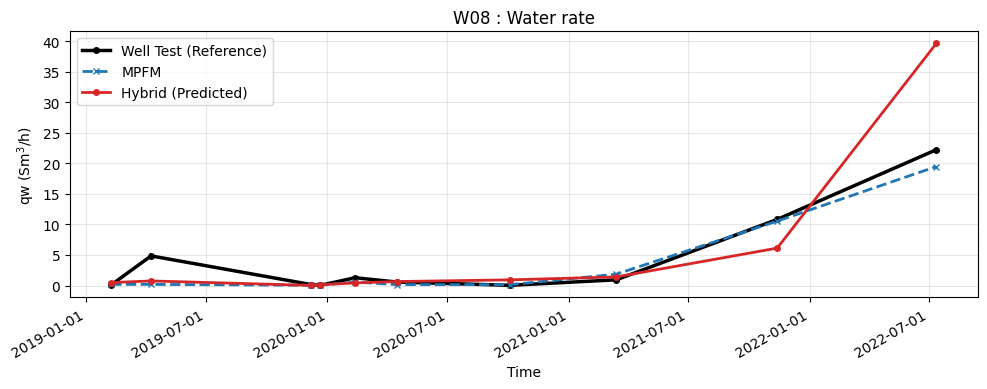

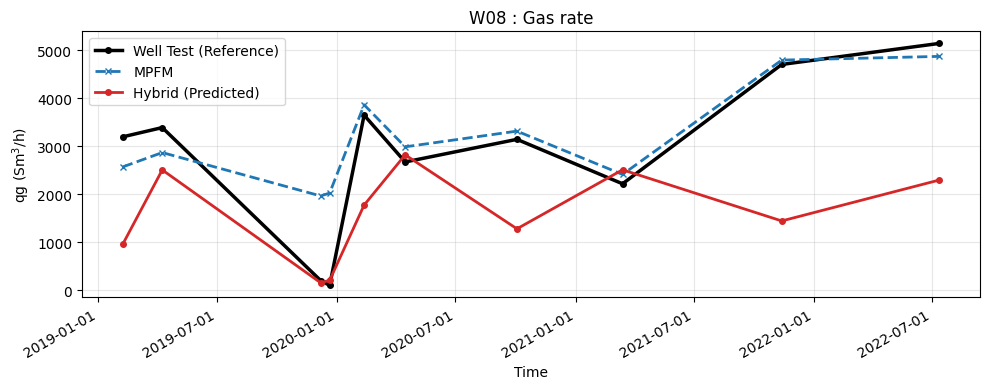

In [ ]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### LOWO test

In [ ]:
df_train_lowo, df_val_lowo, df_calibration_lowo, df_test_lowo = get_lowo_train_val_test_split(df=df_all_wells_preprocessed, test_well_id="W10")
print(f"Train={len(df_train_lowo)}, Val={len(df_val_lowo)}, Calibration={len(df_calibration_lowo)}, Test={len(df_test_lowo)}")

Train=423, Val=111, Calibration=22, Test=199


In [ ]:
model_lowo = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry)
model_lowo.fit(df=df_train_lowo, df_val=df_val_lowo)

[Validation] Residual RMSE = 0.7384


In [ ]:
model_lowo.calibrate_physics_only(df=df_calibration_lowo)

In [ ]:
model_lowo.score_physics(df_test_lowo)

{'W10': {'qo': {'r2': 0.39411079091100787,
   'mae': 19.950610973100865,
   'rmse': 25.492657116453394,
   'mape (%)': 21.316817220474533,
   'mpe (%)': 6.640535610603414},
  'qw': {'r2': 0.3662502309263601,
   'mae': 3.712250017163236,
   'rmse': 6.9335772088616885,
   'mape (%)': 498868.4879820427,
   'mpe (%)': 498813.2832800043},
  'qg': {'r2': 0.7264593582708649,
   'mae': 1604.192581406486,
   'rmse': 2200.399265846013,
   'mape (%)': 283.56518951091647,
   'mpe (%)': 268.5917262775439},
  'wgr': {'r2': 0.3184169320618484,
   'mae': 0.00030559658795547954,
   'rmse': 0.0006591277351100441,
   'mape (%)': 166.74210945645754,
   'mpe (%)': 108.96952290212103},
  'gor': {'r2': -1.1615235089459244,
   'mae': 12.73200394722985,
   'rmse': 22.46546668097304,
   'mape (%)': 159.6629924952384,
   'mpe (%)': 144.6499773663089}}}

In [ ]:
model_lowo.score_hybrid(df_test_lowo)

{'W10': {'qo': {'r2': 0.7791298667166608,
   'mae': 12.10043718396241,
   'rmse': 15.391714262754553,
   'mape (%)': 11.305767210654633,
   'mpe (%)': -0.3177472305183005},
  'qw': {'r2': 0.671522751654583,
   'mae': 2.7499938674842515,
   'rmse': 4.991730107817696,
   'mape (%)': 191645.78404767183,
   'mpe (%)': 191528.4940308958},
  'qg': {'r2': -0.07759424520823832,
   'mae': 3087.7859720995466,
   'rmse': 4367.351957212738,
   'mape (%)': 36.97103988911806,
   'mpe (%)': -11.711994670950098},
  'wgr': {'r2': 0.48783328569500795,
   'mae': 0.00023622297571943506,
   'rmse': 0.0005713679361186775,
   'mape (%)': 90.45533503127186,
   'mpe (%)': -33.354875809856196},
  'gor': {'r2': -10.936640175786753,
   'mae': 37.064210590639426,
   'rmse': 52.793020970242694,
   'mape (%)': 39.23003797780725,
   'mpe (%)': -9.004616190524892}}}

In [ ]:
model_lowo.score_mpfm(df=df_test_lowo)

{'W10': {'qo': {'r2': 0.960400242673188,
   'mae': 3.890070825446965,
   'rmse': 6.543739889555331,
   'mape (%)': 3.2380790286202035,
   'mpe (%)': 1.1581603716163558},
  'qw': {'r2': 0.8869816281461188,
   'mae': 2.510559525473737,
   'rmse': 2.9415132208235675,
   'mape (%)': 481368.1497405781,
   'mpe (%)': 481354.63197847933},
  'qg': {'r2': 0.9439614496026917,
   'mae': 499.2476941550481,
   'rmse': 999.9823336570489,
   'mape (%)': 437.1742125021295,
   'mpe (%)': 436.3301962104051},
  'wgr': {'r2': 0.9320625863132642,
   'mae': 0.00016776604368771636,
   'rmse': 0.0002091423779506429,
   'mape (%)': 150.7590616904153,
   'mpe (%)': 137.38331846022132},
  'gor': {'r2': 0.10572868115329992,
   'mae': 7.441838514243728,
   'rmse': 14.523109292347753,
   'mape (%)': 444.4123398477989,
   'mpe (%)': 440.6669167009459}}}

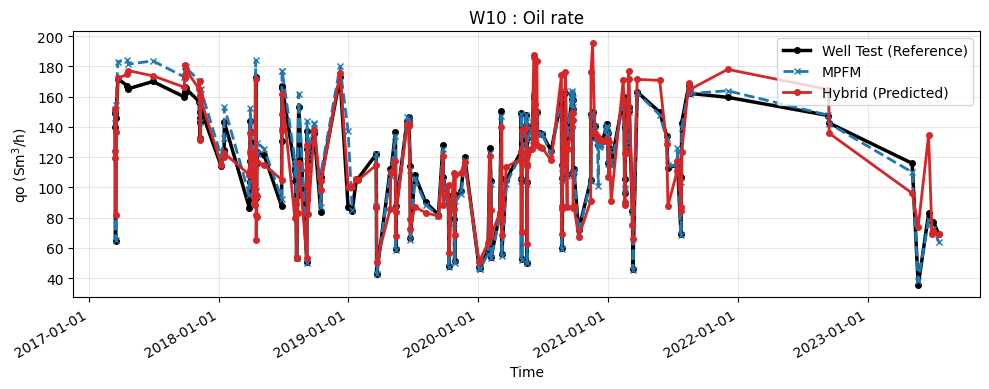

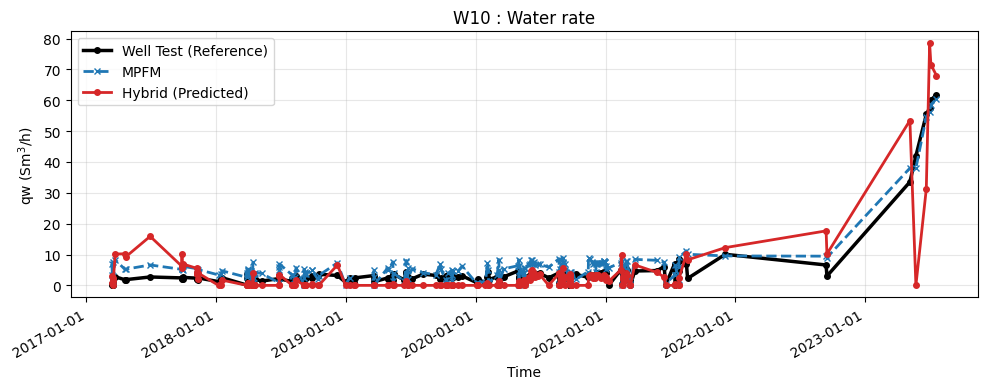

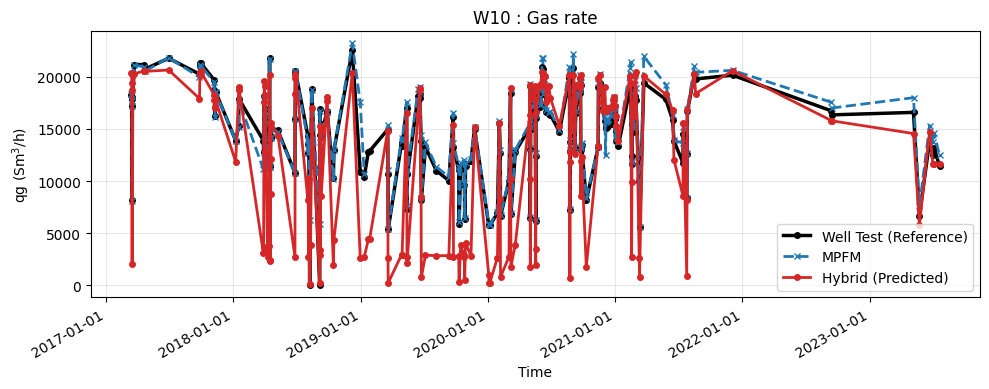

In [ ]:
model_lowo.plot_predictions(df=df_test_lowo, model_tag_prefix="lowo")

### Resample and interpolate

In [ ]:
# resampler = Resampler()
# df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
# print(summarize_null(df=df_resampled))
# print(df_resampled.shape)

In [ ]:
# df_resampled.index

In [ ]:
# df_resampled.columns

In [ ]:
# df_resampled[df_resampled["is_observed"] == 1].shape

In [ ]:
# Monotonic
# df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

In [ ]:
# df_generated = model.generate_dense_well_rates(df=df_resampled)
# df_generated

In [ ]:
# summarize_null(df_generated)